# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

import seaborn as sns

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

# Reading in the data using URL method within read_csv function.
# gzip parameter being called to specify it is in a zipped format, so has to be decompressed. 
# Delimiter specified to be tab delimited format after reviewing the physical raw data format.
wines = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", delimiter='\t', compression = 'gzip')
print(wines.shape)

print(f"Before cleaning, the column counts are:\n {wines.count()}")

wine_clean = wines.dropna(how='any')
print(f"After cleaning, the column counts are:\n {wine_clean.count()}")

# There arent any missing values in the dataset as counts after dropping missing values is equal to before dropping.

(1599, 12)
Before cleaning, the column counts are:
 fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
target                  1599
dtype: int64
After cleaning, the column counts are:
 fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
target                  1599
dtype: int64


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
print(wines.columns)
wines.describe()

# df['alcohol'].describe

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


YOUR ANSWERS HERE

1. **fixed acidity**<br>
Description: Continuous feature measuring fixed acidity of wine, likely tartaric, malic, and citric acids, which do not evaporate during winemaking and contribute to the wine's taste.<br>
Summary:<br>
Range: 4.6–15.9 (mean 8.32, std 1.74)<br>
Median (50%): 7.9<br>
Distribution is right-skewed (max much greater than 75%).<br>
Most values lie between 7.1 and 9.2 (interquartile range, IQR).<br>

2. **volatile acidity**<br>
Description: Volatile acidity (VA) refers to the gaseous acids in a liquid, most notably in wine, where it primarily consists of acetic acid and ethyl acetate.<br> Fixed Acidity + Volatile Acidity = Total Acidity.<br>
Summary:<br>
Range: 0.12–1.58 (mean 0.53, std 0.18)<br>
Median: 0.52<br>
Distribution: Slightly right-skewed (mean > median).<br>

3. **Citric Acid**<br>
Description: Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.<br>
Summary:<br>
Range: 0.00–1.00 (mean 0.27, std 0.19)<br>
Median: 0.26<br>
Distribution: Slightly right-skewed.<br>

4. **Residual Sugar**<br>
Description: Sugar left after fermentation.<br>
Summary:<br>
Range: 0.9–15.5 (mean 2.54, std 1.41)<br>
Median: 2.2<br>
Distribution: Most values are between 1.9 and 2.6, with some very high-value outliers (max 15.5).<br>

5. **Chlorides**<br>
Description: Salt content in wine, with high values usually mean undesirable tastes.<br>
Summary:<br>
Range: 0.012–0.611 (mean 0.087, std 0.047)<br>
Median: 0.079<br>
Distribution: Most values are concentrated in a small range like Residual Sugar(IQR: 0.07–0.09), small number of high-value outliers.<br>

6. **Free Sulfur Dioxide**<br>
Description: This substance protects wine from oxidation.<br>
Summary:<br>
Range: 1–72 (mean 15.87, std 10.46)<br>
Median: 14<br>
Distribution: This feature is also right-skewed (max value is almost 7 times the mean value).<br>

7. **Total Sulfur Dioxide**<br>
Description: Total level of sulfur dioxide in wine is equal to bound plus free sulfur dioxide. Bound sulfur dioxide is the portion of added sulfur dioxide that chemically bounded with other components of the wine.<br>
Summary:<br>
Range: 6–289 (mean 46.5, std 32.9)<br>
Median: 38<br>
Distribution: Wide values range with a right-skewed distribution (IQR from 22–62).<br>

8. **Density**<br>
Description: Density of wine is a measure in chemistry terms, slightly less than water (1 g/mL or 1000 kg/m³), typically ranging around 0.99 to 1.00 g/mL (990-1000 kg/m³) in room temperature.<br>
Summary:<br>
Range: 0.99007–1.00369 (mean 0.99675, std 0.00189)<br>
Median: 0.99675<br>
Distribution: Narrowly distributed in terms of value range, distribution is fairly normal presenting a bell shape curve.<br>

9. **pH**<br>
Description: pH value of wine (unitless), lower is more acidic.<br>
Summary:<br>
Range: 2.74–4.01 (mean 3.31, std 0.154)<br>
Median: 3.31<br>
Distribution: Distribution of pH level is looking symmetric and normally distributed where median equals means<br>

10. **Sulphates**<br>
Description: Salt content within wine(g/dm³), contributes to sulfur dioxide content and antimicrobial protection in wine.<br>
Summary:<br>
Range: 0.33–2.00 (mean 0.66, std 0.17)<br>
Median: 0.62<br>
Distribution: IQR: 0.55–0.73, slightly right-skewed, some outliers (greater than 1.5*IQR).<br>

11. **Alcohol**<br>
Description: Alcohol content (% by volume).<br>
Summary:<br>
Range: 8.4–14.9 (mean 10.42, std 1.07)<br>
Median: 10.2<br>
Most values between 9.5–11.1.<br>
Distribution: Also right-skewed with some outliers.<br>

12. **target**<br>
Description: Target variable, likely wine quality rating (integer, perhaps 3–8).<br>
Summary:<br>
Range: 3–8 (mean 5.64, std 0.81)<br>
Median: 6<br>
Most samples are rated 5 or 6,<br>
Distribution: Target scores are discrete values and the only distribution that is left-skewed. Seems most wines get above 5 ppints on a 10 point scale. (People just like to drink i guess)<br>

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

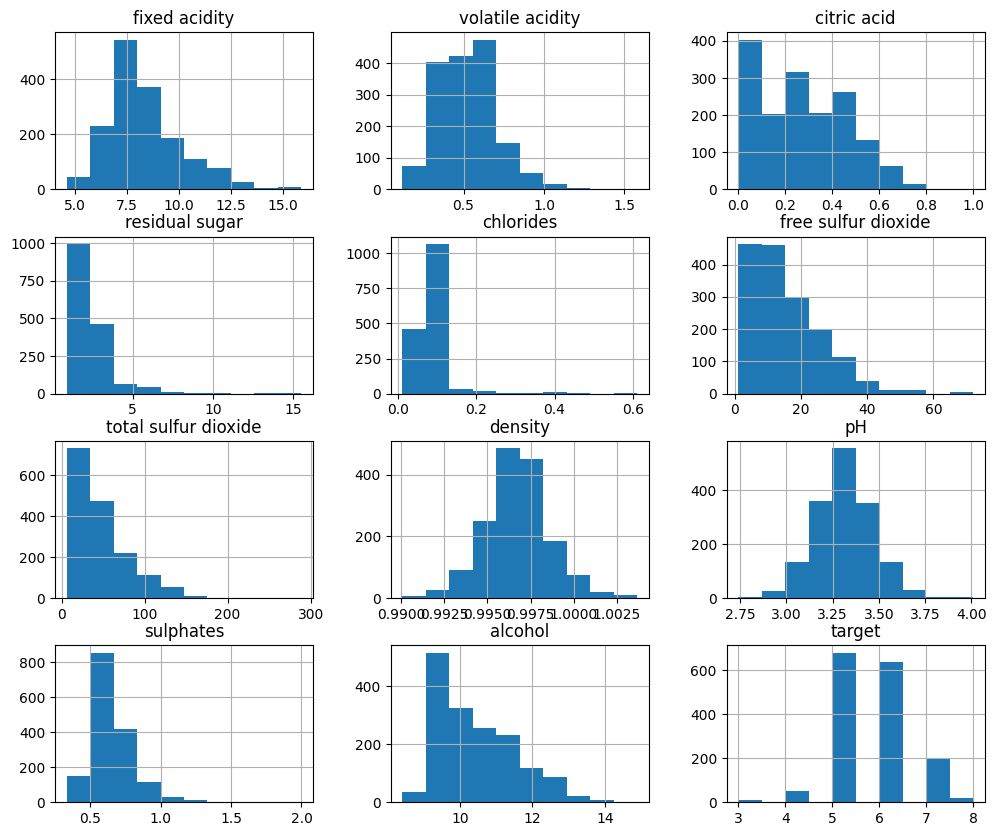

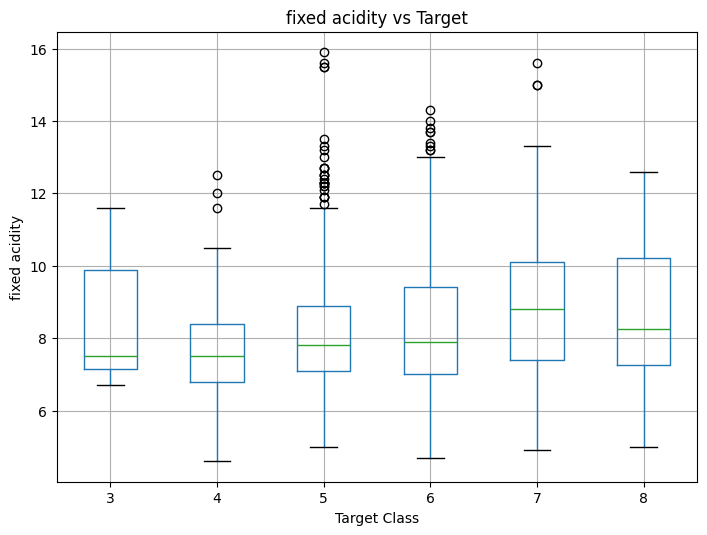

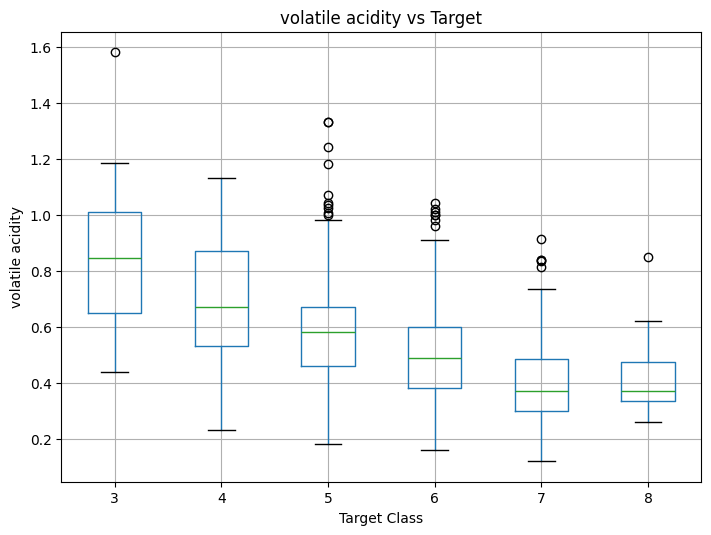

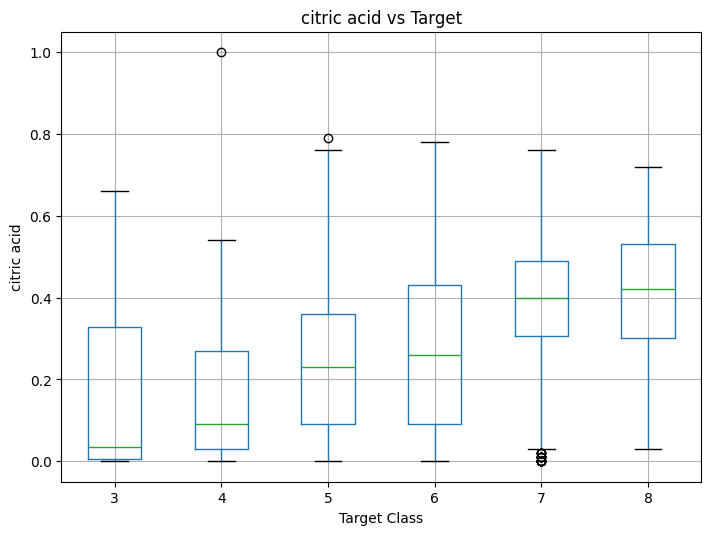

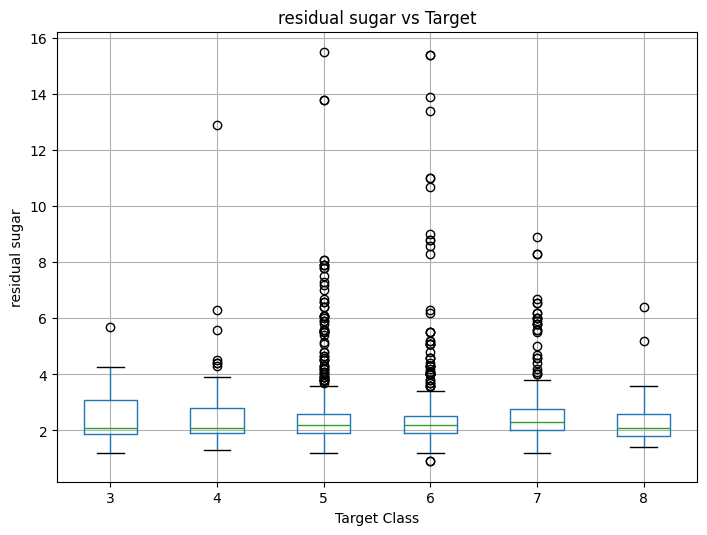

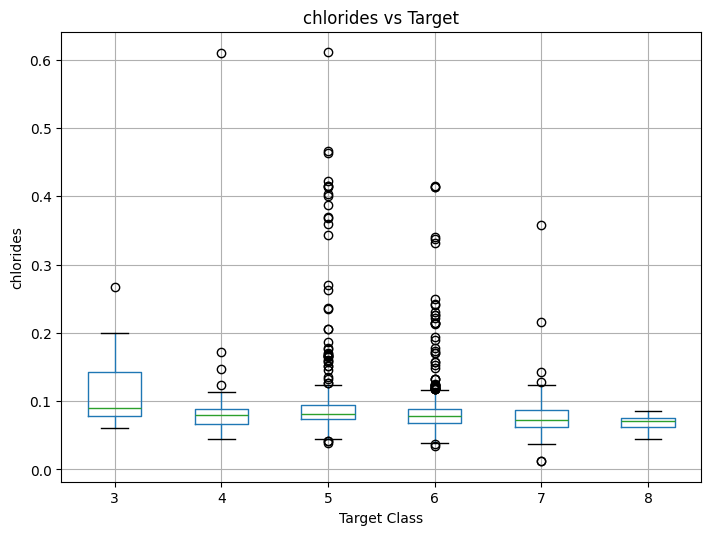

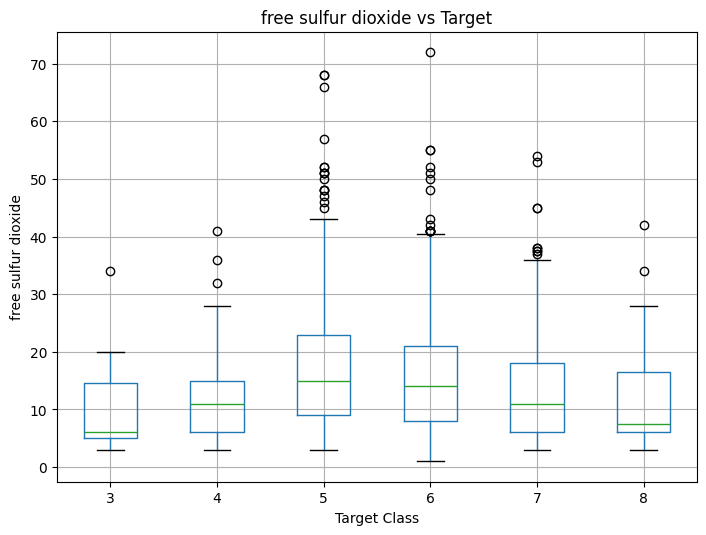

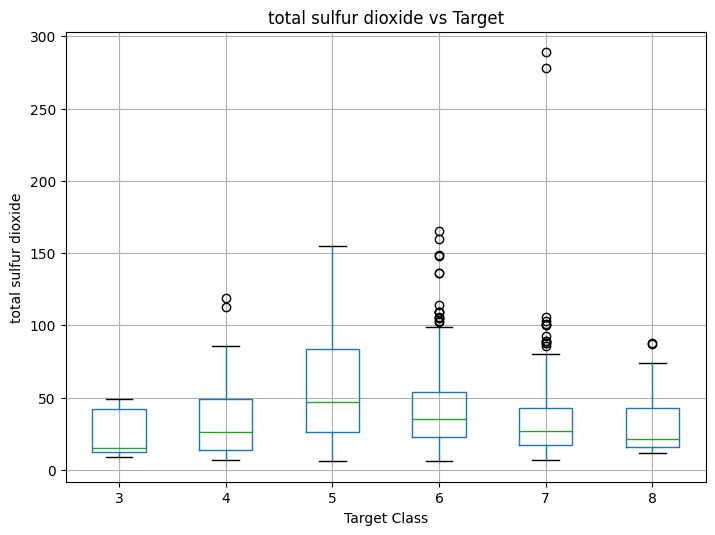

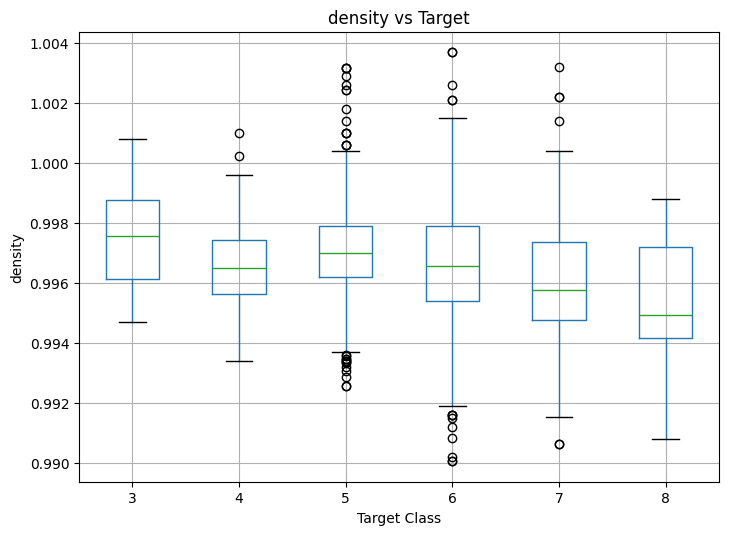

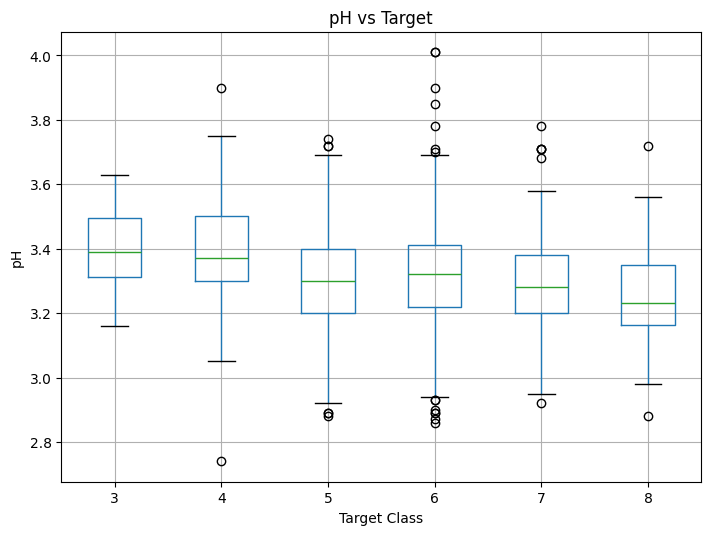

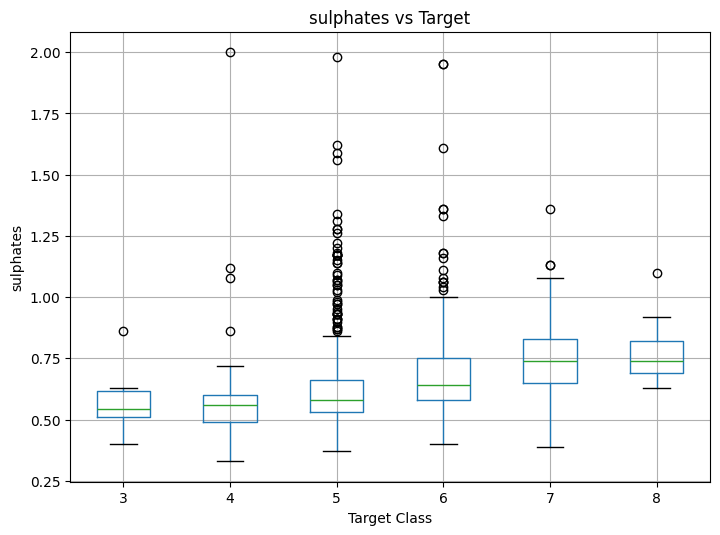

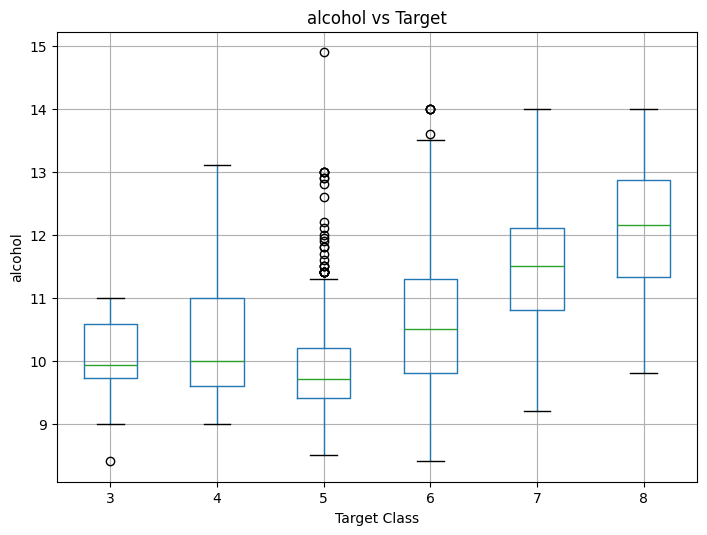

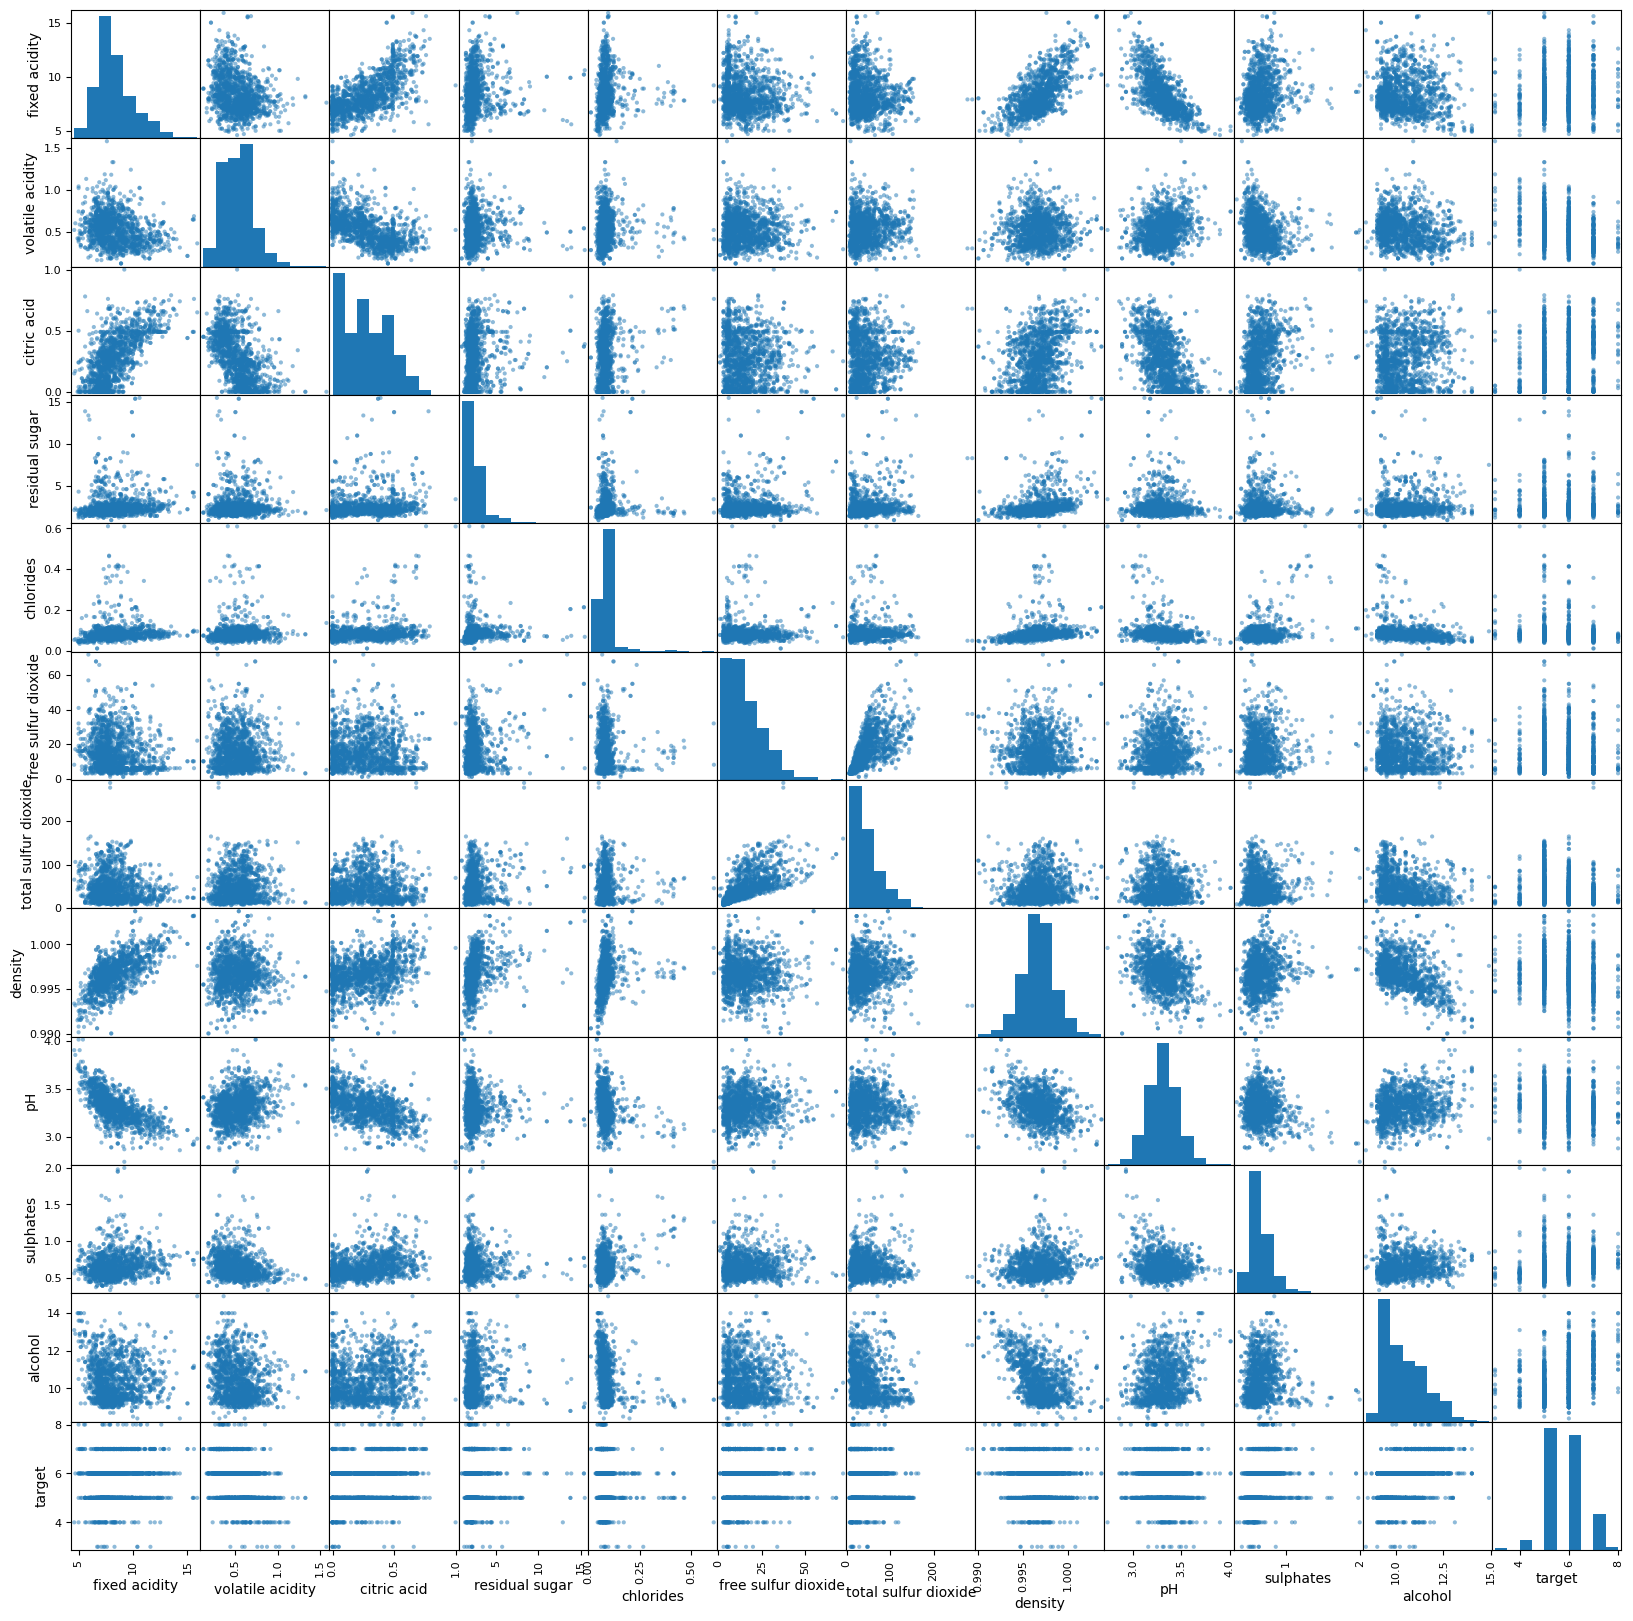

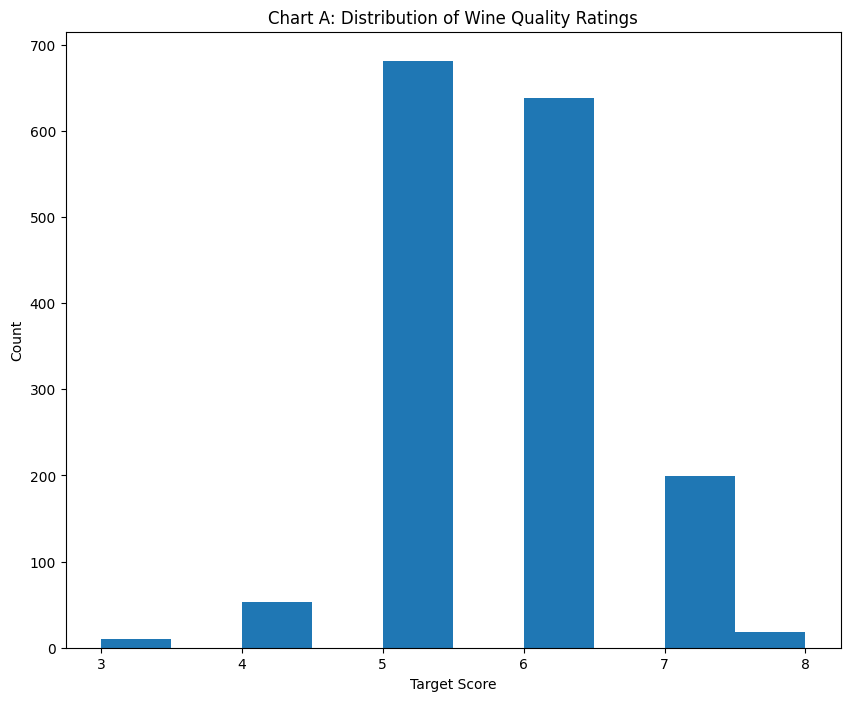

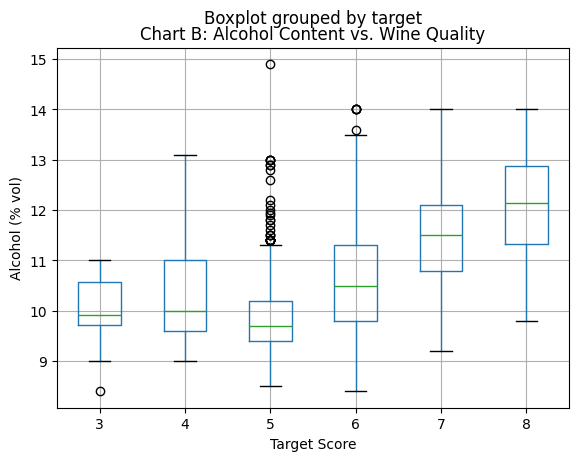

<Figure size 800x500 with 0 Axes>

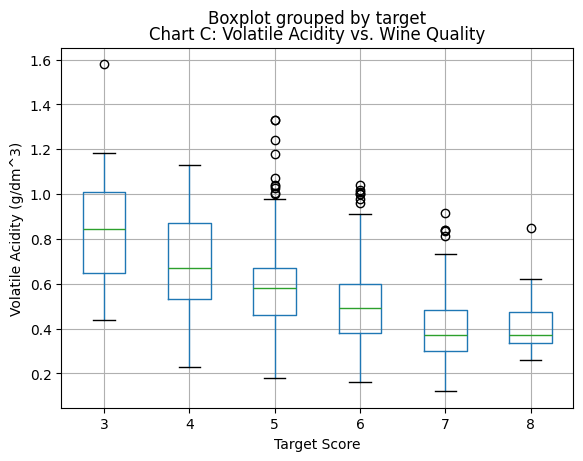

In [5]:
# YOUR CODE HERE
wines.dtypes

wines.hist(figsize=(12, 10))
plt.show()


features = wines.drop(columns =['target'])

#Building a bosplot for each of the features grouped by boxlplot. Since target value is the dependent variable here, 
#exploring the distribution of each feature given different levels of target level would be insightful.
#Choosing to do boxplot over scatterplot here because target value is categorical, and would be more useful to see the distribution within groups in comprison to across group. 
#This is easily to see with a boxplot where it shows the 25% quantile, median and 75% quantile. Boxplot would also show outliers from within each group.

for col in features.columns:
    #Create a new figure/axis to prevent overlaying
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the specific column
    wines.boxplot(column=col, by='target', ax=ax)
    
    # Adding title
    plt.title(f'{col} vs Target') 
    plt.suptitle('') # Removes the default subtitle
    
    # 4. Add axis label 
    plt.xlabel('Target Class')
    plt.ylabel(col)
    plt.show()

#Aside from relationship with the target value, it would also be good to observe the relationship between each features.
from pandas.plotting import scatter_matrix
#plotting all columns against each other to observe linear relationship cross features.
scatter_matrix(wines, figsize=(20, 20))
plt.show()

#target = wines['target']

# wines.boxplot(column=list(features.columns), by ='target', figsize=(15,15))
# plt.xlabel('Target Score')
# plt.show()

#################### FINAL 3 PICKS ####################

#Chart A: Distribution of Wine Ratings
# Why noteworthy: 
# Since our dependent variable is 'target',that would be the most important parameter to examine. 
# The distribution of target score is interesting here upon closer examination, the vast majority of wines are rated 5 or 6 (average), with very few wines achieving high scores (8) or low scores (3 or 4). 
# Models will likely be very good at predicting wines near average scores but may struggle to make good predictions on wine with really high scores or really low scores because of lower available sample.
# Probably more important for the higher end of target scores since that's what people would care more about.
plt.figure(figsize=(10, 8))
plt.hist(x='target', data=wines)
plt.title('Chart A: Distribution of Wine Quality Ratings')
plt.xlabel('Target Score')
plt.ylabel('Count')
plt.show()

# Chart B: Alcohol vs Target
# Why noteworthy:
# When plotting alcohol level against target values, there is a clear positive trend. As target value gets higher, the level of alcohol within wine is also getting higher.
# This could be a very good predictor of target score, and it is one that would make sense as well. 
# The more alcohol dense wines are more favored by the experts (probably drinks more wine and are custom to more alcoholic wine). 
wines.boxplot(column='alcohol', by ='target')
plt.title('Chart B: Alcohol Content vs. Wine Quality')
plt.xlabel('Target Score')
plt.ylabel('Alcohol (% vol)')
plt.show()

# Chart C: Volatile Acidity vs Target
# Why noteworthy:
# There were 2 features' boxplots with obvious directional trends when graphed against target value. One is alcohol level, another is volatile acidity level. 
# Different from alocohol level, volatile acidity level decreases as target scores get higher, indicating that wines with better scores are likely less acidic. 
# This make sense too as wines being too acidic simply become vinegar.
plt.figure(figsize=(8, 5))
wines.boxplot(by='target', column='volatile acidity')
plt.title('Chart C: Volatile Acidity vs. Wine Quality')
plt.xlabel('Target Score')
plt.ylabel('Volatile Acidity (g/dm^3)')
plt.show()


YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

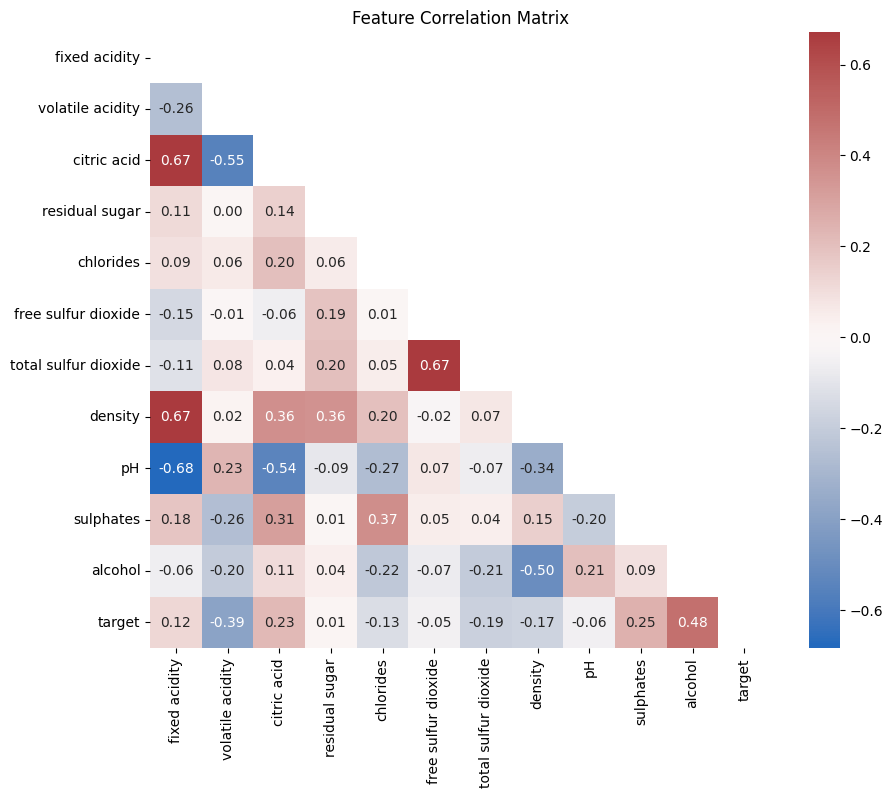

In [6]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8))
#computing for the correlations
corr = wines.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) #blocking out the top triangle because it's a mirror of the bottom triangle in correlation matrix

#Genderating a heatmap using seaborn
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

#From the correlation matrix, these are the correlated features: 
# Citric acid vs fixed acidity: 0.67 
# Total sulfur dioxide vs free sulfur dioxide: 0.67
# Density vs fixed acidity: 0.67
# pH level vs fixed acidity: -0.68
# pH level vs critic acid: -0.54
# alcohol level vs density: -0.50
# alcohol level vs target value: 0.48

# It's easy to see that the acid levels are somewhat dependent on each other, which make sense.
# Also, alcohol level being correlated with density make sense as well, as alcohol is generally less dense when compared to a benchmark value like whater density. Which means alcohol level should affect density.
# Mostly notibly of course is correlation between alcohol level and target value, meaning alcohol level along explains nearly half of what target value's variance. That is very significant.


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE
##Linear Regression:
## scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
## second link: https://developers.google.com/machine-learning/crash-course/linear-regression

## Random Forest Regressor:
## scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
## second link: https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

## SVR (Support Vector Regression):
## scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
## second link: https://en.wikipedia.org/wiki/Support_vector_machine

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

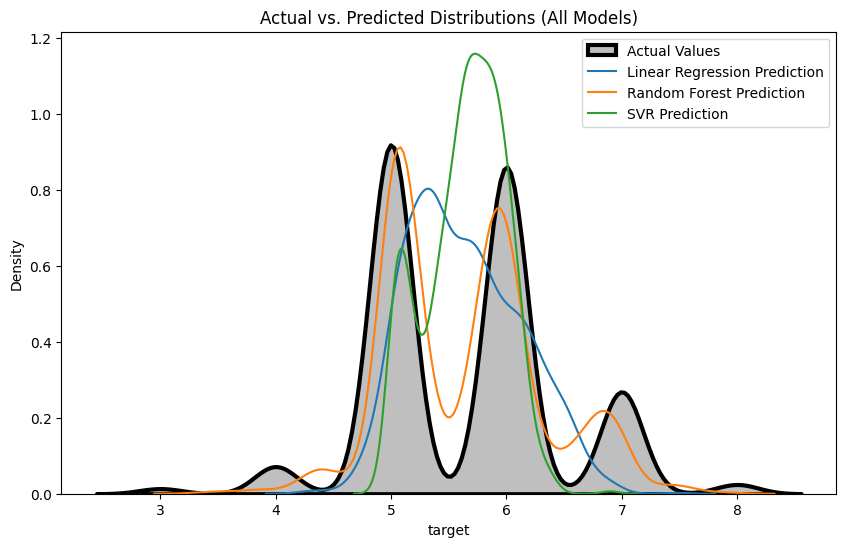

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = wines.drop('target', axis=1)

#X.head()

y = wines['target']

#y.head()

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'SVR': SVR()
}

### Modeling: Train on All feature columns
results_base = []
preds_dict = {}

#Setting the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y, label='Actual Values', fill=True, color='black', linewidth=3)

#Fitting the models for all 3 chosen models
for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X)
    preds_dict[name] = preds
    
    #Computing L1 and L2 loss
    l1 = mean_absolute_error(y, preds)
    l2 = mean_squared_error(y, preds)
    results_base.append({'Model': name, 'Full_feature Train L1': l1, 'Full_feature Train L2': l2})
    
    sns.kdeplot(preds, label=f'{name} Prediction')

plt.title('Actual vs. Predicted Distributions (All Models)')
plt.legend()
plt.show()



YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [16]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score, KFold

results_cv=[]

for name, model in models.items():
# 1. Initialize KFold with the same random state
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores = []
    
    # 2. Manual Cross-Validation Loop
    # cv.split returns indices for training and testing sets
    for train_index, test_index in cv.split(X):
        # Split the data
        # Using .iloc is safer if X and y are pandas DataFrames/Series
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the test fold
        preds_fold = model.predict(X_test_fold)
        
        # Calculate MSE 
        mse = mean_squared_error(y_test_fold, preds_fold)
        cv_scores.append(mse)
    
    # Calculate the mean of the scores
    cv_l2 = np.mean(cv_scores)
    #Multipling -1 to CV L2 Loss because it can then show comparison 
    results_cv.append({'Model': name, 'CV L2 Loss': cv_l2})

# Merge and display results
df_base = pd.DataFrame(results_base)
df_cv = pd.DataFrame(results_cv)
comparison_df = pd.merge(df_base, df_cv, on='Model')

# Note: 'Full_feature Train L2' must exist in df_base from previous steps
comparison_df['Overfitting Gap'] = comparison_df['CV L2 Loss'] - comparison_df['Full_feature Train L2']
print(comparison_df)


               Model  Full_feature Train L1  Full_feature Train L2  \
0  Linear Regression                0.50049               0.416767   
1      Random Forest                0.14863               0.044484   
2                SVR                0.54630               0.523093   

   CV L2 Loss  Overfitting Gap  
0    0.427530         0.010763  
1    0.341700         0.297216  
2    0.547251         0.024158  


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

results_pipe = []

# Loop through each model in your dictionary
for name, model in models.items():
    
    # Define the KFold parameters
    cv = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # List to store MSE for each of the 5 folds
    fold_scores = []
    
    # Manual Cross-Validation Loop
    for train_index, test_index in cv.split(X):
        # 1. Split data into Train and Validation folds
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        
        # Create the Pipeline to include all models
        # fit the 3 models for every fold
        pipe = make_pipeline(StandardScaler(),
                             PCA(), 
                             model)
        
        # 3. Fit the Pipeline on training data only
        pipe.fit(X_train_fold, y_train_fold)
        
        # 4. Predict on the validation fold
        # The pipeline automatically applies the train-derived scaling/PCA transform to this test data
        preds_fold = pipe.predict(X_test_fold)
        
        # 5. Calculate MSE (L2)
        mse = mean_squared_error(y_test_fold, preds_fold)
        fold_scores.append(mse)
    
    # Average the scores across all 5 folds
    pipe_l2 = np.mean(fold_scores)
    
    results_pipe.append({'Model': name, 'Scaled CV L2 Loss': pipe_l2})

# Create DataFrame and Comparison
df_pipe = pd.DataFrame(results_pipe)

# Merge with previous results (assuming comparison_df exists from previous steps)
final_comparison = pd.merge(comparison_df[['Model', 'CV L2 Loss']], df_pipe, on='Model')
final_comparison['Impact of Scaling'] = final_comparison['CV L2 Loss'] - final_comparison['Scaled CV L2 Loss']

#Impact of scaling numbers are showing as scientific notation, so printing to set values to float form
print(final_comparison.to_string(formatters={'Impact of Scaling': '{:,.6f}'.format}))

               Model  CV L2 Loss  Scaled CV L2 Loss Impact of Scaling
0  Linear Regression    0.427530           0.427530          0.000000
1      Random Forest    0.341700           0.351687         -0.009988
2                SVR    0.547251           0.396544          0.150707


**Explanation to Problem 8 Code** <br>
While linear regression and random forest models did not should any significant different before and after scaling (near zero changes), SVR shows something completely different. <br>
This is likely because linear regression taking scaling into account while calculating sum of squared errors, the coefficients of the model changed, but how much features explain variance does not change. <br>
For random forest classification, it's likely because classifications are based on a threshold, and therefore should not be affected by value ranges. <br>

For SVR, the result improved by a lot as L2 loss decreased significantly more in the scaled model when comparing to linear regression and random forest. <br>
Since SVR is a clustering algorithem based on computing the distance between data points, <br>
scaling then becomes significant because standardization of distances puts features in a different pespective when comparing to their raw values. <br>

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

**Answer to P9:** <br>
This approach is flawed because selecting the single "best" model from 1000 random attempts leads to overfitting the validation set, the selected model can simply be statistically "lucky" with the noise instead of one that actually learned from understanding features.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

YOUR ANSWERS HERE